In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!pip install mdptoolbox-hiive

In [4]:
import hiive.mdptoolbox.mdp, hiive.mdptoolbox.example

In [5]:
np.random.seed(2)

# 1. Value Iteration

In [7]:
P, R = hiive.mdptoolbox.example.forest(2000)

gamma = 0.9

value_iteration = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma)

run = value_iteration.run()
num_iter = value_iteration.iter

state_run = pd.DataFrame(run)

In [8]:
num_iter

39

### Test:

In [9]:
state_run

,State,Action,Reward,Error,Time,Max V,Mean V,Iteration
0,None,None,4.000000,4.000000,0.006392,4.000000,1.001000,1
1,None,None,7.240000,3.240000,0.012819,7.240000,1.004145,2
2,None,None,9.937300,2.624400,0.022808,9.937300,1.735269,3
3,None,None,12.128674,2.125764,0.029229,12.128674,1.804569,4
4,None,None,13.957422,1.721869,0.035555,13.957422,2.344282,5
5,None,None,15.448326,1.394714,0.042011,15.448326,2.443952,6
6,None,None,16.695997,1.129718,0.048430,16.695997,2.846389,7
7,None,None,17.717226,0.915072,0.054795,17.717226,2.955406,8
8,None,None,18.574565,0.741208,0.061114,18.574565,3.258530,9
9,None,None,19.279462,0.600379,0.068195,19.279462,3.365224,10


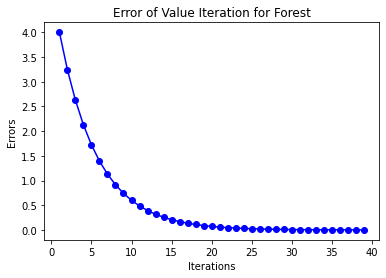

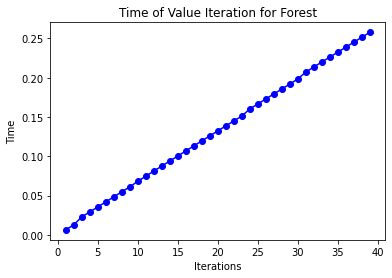

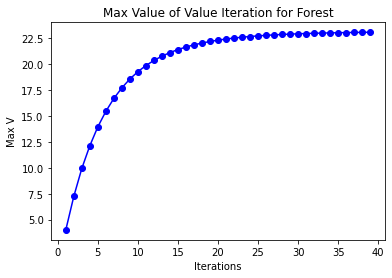

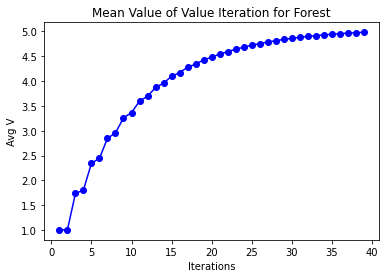

In [11]:
fig, ax = plt.subplots()
ax.plot(state_run['Iteration'] , state_run['Error'], "bo-")
ax.set_xlabel('Iterations')
ax.set_ylabel('Errors')
ax.set_title('Error of Value Iteration for Forest')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(state_run['Iteration'] , state_run['Time'], "bo-")
ax.set_xlabel('Iterations')
ax.set_ylabel('Time')
ax.set_title('Time of Value Iteration for Forest')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(state_run['Iteration'] , state_run['Max V'], "bo-")
ax.set_xlabel('Iterations')
ax.set_ylabel('Max V')
ax.set_title('Max Value of Value Iteration for Forest')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(state_run['Iteration'] , state_run['Mean V'], "bo-")
ax.set_xlabel('Iterations')
ax.set_ylabel('Avg V')
ax.set_title('Mean Value of Value Iteration for Forest')
plt.show(fig)

### Tune Gamma:

In [16]:
loop_gamma = np.arange(0.1, 1 , 0.01)

util_opt_pol_vi = []
num_iterations_vi = []
time_taken_list_vi = []
rewards_list_vi = []

for i in loop_gamma:
    print("Current gamma is:", i)

    vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, i)

    vi.run()

    util_opt_pol_vi.append(vi.policy)
    num_iterations_vi.append(vi.iter)
    time_taken_list_vi.append(vi.time)
    rewards_list_vi.append([np.max(vi.V), np.mean(vi.V)])
    
    print("Utility of optimal policy is:" ,(np.max(vi.V), np.mean(vi.V)))
    print("Converge time is:", vi.time)
    print('Converge Iteration is:', vi.iter)

Current gamma is: 0.1
Utility of optimal policy is: (4.36, 1.001225)
Converge time is: 0.007333278656005859
Converge Iteration is: 2
Current gamma is: 0.11
Utility of optimal policy is: (4.396, 1.0012474999999998)
Converge time is: 0.005598545074462891
Converge Iteration is: 2
Current gamma is: 0.12
Utility of optimal policy is: (4.432, 1.0012699999999999)
Converge time is: 0.006253719329833984
Converge Iteration is: 2
Current gamma is: 0.13
Utility of optimal policy is: (4.468, 1.0012925)
Converge time is: 0.006063938140869141
Converge Iteration is: 2
Current gamma is: 0.13999999999999999
Utility of optimal policy is: (4.569268, 1.018970876)
Converge time is: 0.009816646575927734
Converge Iteration is: 3
Current gamma is: 0.14999999999999997
Utility of optimal policy is: (4.6149249999999995, 1.0216057250000004)
Converge time is: 0.008588075637817383
Converge Iteration is: 3
Current gamma is: 0.15999999999999998
Utility of optimal policy is: (4.661248, 1.0244207359999997)
Converge time

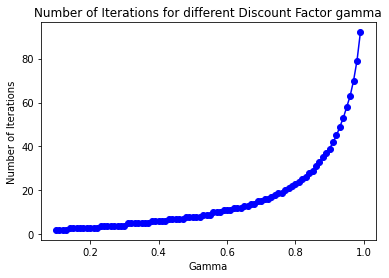

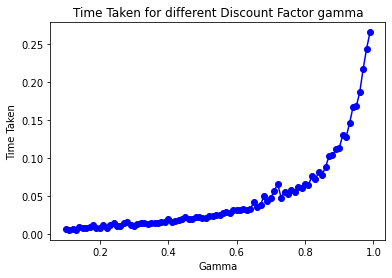

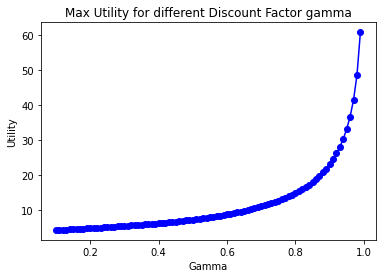

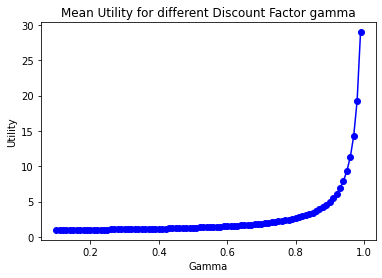

In [17]:
fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , num_iterations_vi, "bo-")
ax.set_xlabel('Gamma')
ax.set_ylabel('Number of Iterations')
ax.set_title('Number of Iterations for different Discount Factor gamma')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , time_taken_list_vi, "bo-")
ax.set_xlabel('Gamma')
ax.set_ylabel('Time Taken')
ax.set_title('Time Taken for different Discount Factor gamma')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , [i[0] for i in rewards_list_vi], "bo-")
ax.set_xlabel('Gamma')
ax.set_ylabel('Utility')
ax.set_title('Max Utility for different Discount Factor gamma')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , [i[1] for i in rewards_list_vi], "bo-")
ax.set_xlabel('Gamma')
ax.set_ylabel('Utility')
ax.set_title('Mean Utility for different Discount Factor gamma')
plt.show(fig)

### Tune state sizes:

In [6]:
gamma = 0.9
loop_size = np.arange(2000, 15001, 1000)

util_opt_pol_vi_size = []
num_iterations_vi_size = []
time_taken_list_vi_size = []
rewards_list_vi_size = []
error_list_vi_size = []

for i in loop_size:
    print("Current Forest Size is:", i)

    P, R = hiive.mdptoolbox.example.forest(i)
    vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma)

    vi.run()

    util_opt_pol_vi_size .append(vi.policy)
    num_iterations_vi_size.append(vi.iter)
    time_taken_list_vi_size.append(vi.time)
    rewards_list_vi_size.append([np.max(vi.V), np.mean(vi.V)]) 
    error_list_vi_size.append(vi.error_mean)

    print("Utility of optimal policy is:" ,(np.max(vi.V), np.mean(vi.V)))
    print("Converge time is:", vi.time)
    print('Converge iteration is:', vi.iter)

Current Forest Size is: 2000
Utility of optimal policy is: (23.089675091923866, 4.983734089077706)
Converge time is: 0.11935281753540039
Converge iteration is: 39
Current Forest Size is: 3000
Utility of optimal policy is: (23.089675091923866, 4.972458932348754)
Converge time is: 0.29265546798706055
Converge iteration is: 39
Current Forest Size is: 4000
Utility of optimal policy is: (23.089675091923866, 4.966821353984278)
Converge time is: 0.4666099548339844
Converge iteration is: 39
Current Forest Size is: 5000
Utility of optimal policy is: (23.089675091923866, 4.963438806965592)
Converge time is: 0.7992684841156006
Converge iteration is: 39
Current Forest Size is: 6000
Utility of optimal policy is: (23.089675091923866, 4.961183775619802)
Converge time is: 1.0242886543273926
Converge iteration is: 39
Current Forest Size is: 7000
Utility of optimal policy is: (23.089675091923866, 4.959573038944238)
Converge time is: 1.3075337409973145
Converge iteration is: 39
Current Forest Size is: 80

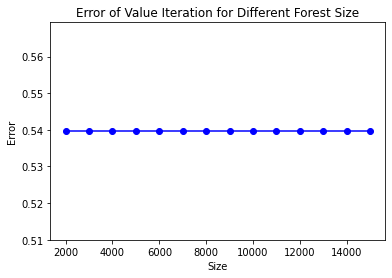

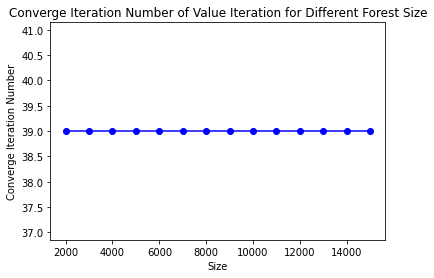

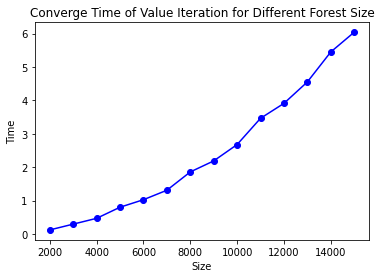

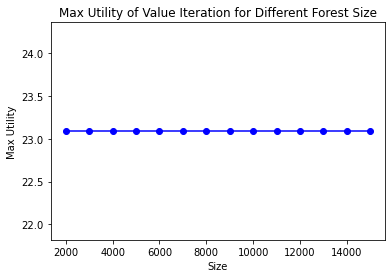

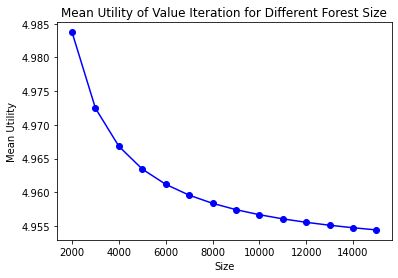

In [66]:
fig, ax = plt.subplots()
ax.plot(list(loop_size) , error_list_vi_size, "bo-")
ax.set_xlabel('Size')
ax.set_ylabel('Error')
ax.set_title('Error of Value Iteration for Different Forest Size')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_size) , num_iterations_vi_size, "bo-")
ax.set_xlabel('Size')
ax.set_ylabel('Converge Iteration Number')
ax.set_title('Converge Iteration Number of Value Iteration for Different Forest Size')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_size) , time_taken_list_vi_size, "bo-")
ax.set_xlabel('Size')
ax.set_ylabel('Time')
ax.set_title('Converge Time of Value Iteration for Different Forest Size')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_size) , [i[0] for i in rewards_list_vi_size], "bo-")
ax.set_xlabel('Size')
ax.set_ylabel('Max Utility')
ax.set_title('Max Utility of Value Iteration for Different Forest Size')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_size) , [i[1] for i in rewards_list_vi_size], "bo-")
ax.set_xlabel('Size')
ax.set_ylabel('Mean Utility')
ax.set_title('Mean Utility of Value Iteration for Different Forest Size')
plt.show(fig)

# 2. Policy Iteration

### Test policy iteration:

In [9]:
P, R = hiive.mdptoolbox.example.forest(2000)

gamma = 0.9
policy_iteration = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma)

run = policy_iteration.run()

state_run_pi = pd.DataFrame(run)

In [10]:
state_run_pi

,State,Action,Reward,Error,Time,Max V,Mean V,Iteration
0,None,None,23.172434,1.414481e+01,0.303465,23.172434,5.036420,1
1,None,None,23.172434,1.090481e+01,0.506588,23.172434,5.043493,2
2,None,None,23.172434,8.280410e+00,0.703912,23.172434,5.048945,3
3,None,None,23.172434,6.154646e+00,0.897999,23.172434,5.053085,4
4,None,None,23.172434,4.432777e+00,1.139702,23.172434,5.056163,5
5,None,None,23.172434,3.038063e+00,1.340971,23.172434,5.058379,6
6,None,None,23.172434,1.908345e+00,1.536707,23.172434,5.059898,7
7,None,None,23.172434,9.932731e-01,1.733794,23.172434,5.060852,8
8,None,None,23.172434,2.520650e-01,1.929559,23.172434,5.061349,9
9,None,None,23.172434,1.776357e-15,2.136616,23.172434,5.061475,10


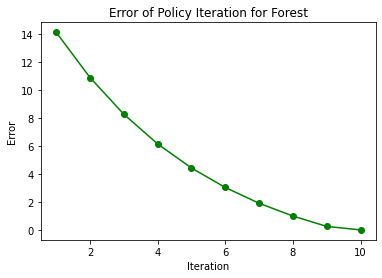

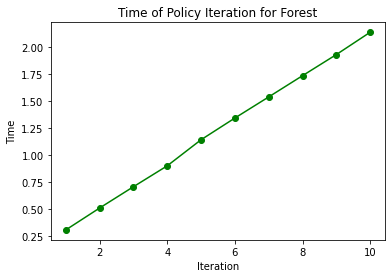

In [12]:
fig, ax = plt.subplots()
ax.plot(state_run_pi['Iteration'] , state_run_pi['Error'], "go-")
ax.set_xlabel('Iteration')
ax.set_ylabel('Error')
ax.set_title('Error of Policy Iteration for Forest')
plt.show(fig)


fig, ax = plt.subplots()
ax.plot(state_run_pi['Iteration'] , state_run_pi['Time'], "go-")
ax.set_xlabel('Iteration')
ax.set_ylabel('Time')
ax.set_title('Time of Policy Iteration for Forest')
plt.show(fig)

### Tune Gamma:

In [13]:
gamma = 0.9
loop_gamma = np.arange(0.1, 1 , 0.01)
P, R = hiive.mdptoolbox.example.forest(2000)

util_opt_pol_pi = []
num_iterations_pi = []
time_taken_list_pi = []
rewards_list_pi = []

for i in loop_gamma:
    print("Current gamma is:", i)

    pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, i)

    pi.run()

    util_opt_pol_pi.append(pi.policy)
    num_iterations_pi.append(pi.iter)
    time_taken_list_pi.append(pi.time)
    rewards_list_pi.append([np.max(pi.V), np.mean(pi.V)])
    
    print("Utility of optimal policy is:" ,(np.max(pi.V), np.mean(pi.V)))
    print("Converge time is:", pi.time)
    print('Converge iteration is:', pi.iter)

Current gamma is: 0.1
Utility of optimal policy is: (4.396612561750176, 1.010409315455187)
Converge time is: 0.1910538673400879
Converge iteration is: 1
Current gamma is: 0.11
Utility of optimal policy is: (4.440747360384749, 1.0123935648345619)
Converge time is: 0.19484376907348633
Converge iteration is: 1
Current gamma is: 0.12
Utility of optimal policy is: (4.485795040626595, 1.0145767504904477)
Converge time is: 0.18898892402648926
Converge iteration is: 1
Current gamma is: 0.13
Utility of optimal policy is: (4.531783865192692, 1.0169619682453799)
Converge time is: 0.1904158592224121
Converge iteration is: 1
Current gamma is: 0.13999999999999999
Utility of optimal policy is: (4.578743291283109, 1.0195525795435305)
Converge time is: 0.19707798957824707
Converge iteration is: 1
Current gamma is: 0.14999999999999997
Utility of optimal policy is: (4.626704033960099, 1.0223522221906)
Converge time is: 0.19057440757751465
Converge iteration is: 1
Current gamma is: 0.15999999999999998
Uti

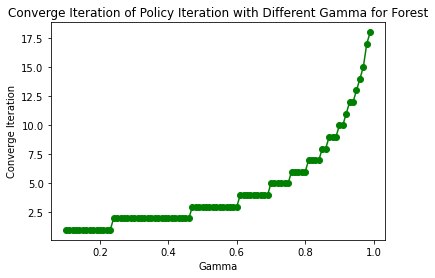

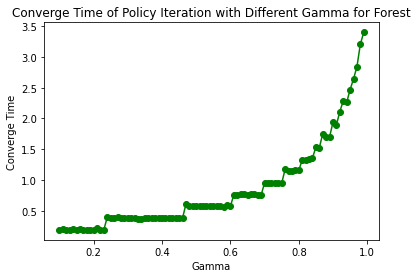

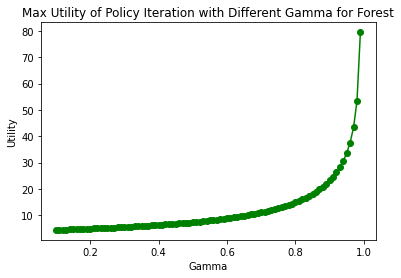

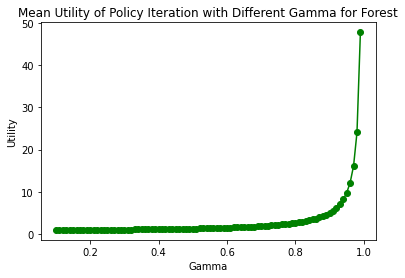

In [65]:
fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , num_iterations_pi, "go-")
ax.set_xlabel('Gamma')
ax.set_ylabel('Converge Iteration')
ax.set_title('Converge Iteration of Policy Iteration with Different Gamma for Forest')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , time_taken_list_pi, "go-")
ax.set_xlabel('Gamma')
ax.set_ylabel('Converge Time')
ax.set_title('Converge Time of Policy Iteration with Different Gamma for Forest')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , [i[0] for i in rewards_list_pi], "go-")
ax.set_xlabel('Gamma')
ax.set_ylabel('Utility')
ax.set_title('Max Utility of Policy Iteration with Different Gamma for Forest')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , [i[1] for i in rewards_list_pi], "go-")
ax.set_xlabel('Gamma')
ax.set_ylabel('Utility')
ax.set_title('Mean Utility of Policy Iteration with Different Gamma for Forest')
plt.show(fig)

### Compare Value Iteration with Policy Iteration

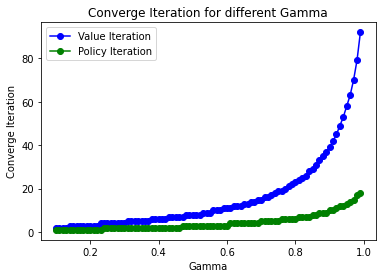

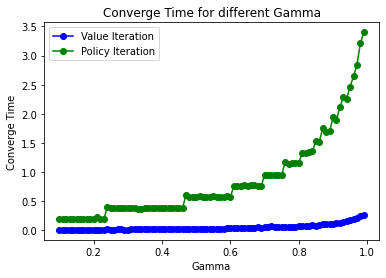

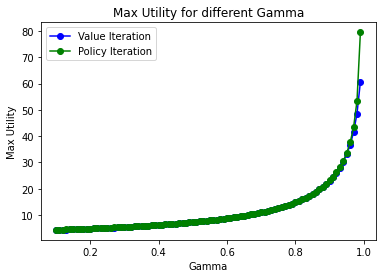

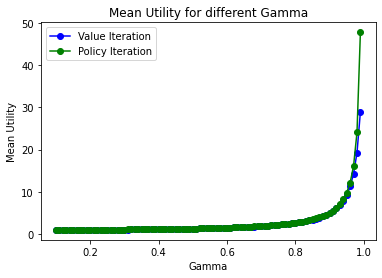

In [64]:
fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , num_iterations_vi, "bo-", label='Value Iteration')
ax.plot(list(loop_gamma) , num_iterations_pi, "go-", label='Policy Iteration')
ax.set_xlabel('Gamma')
ax.set_ylabel('Converge Iteration')
ax.set_title('Converge Iteration for different Gamma')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , time_taken_list_vi, "bo-", label='Value Iteration')
ax.plot(list(loop_gamma) , time_taken_list_pi, "go-", label='Policy Iteration')
ax.set_xlabel('Gamma')
ax.set_ylabel('Converge Time')
ax.set_title('Converge Time for different Gamma')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , [i[0] for i in rewards_list_vi], "bo-", label='Value Iteration')
ax.plot(list(loop_gamma) , [i[0] for i in rewards_list_pi], "go-", label='Policy Iteration')
ax.set_xlabel('Gamma')
ax.set_ylabel('Max Utility')
ax.set_title('Max Utility for different Gamma')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , [i[1] for i in rewards_list_vi], "bo-", label='Value Iteration')
ax.plot(list(loop_gamma) , [i[1] for i in rewards_list_pi], "go-", label='Policy Iteration')
ax.set_xlabel('Gamma')
ax.set_ylabel('Mean Utility')
ax.set_title('Mean Utility for different Gamma')
ax.legend()
plt.show(fig)

### Tune State Sizes:

In [19]:
gamma = 0.9
loop_size = np.arange(2000, 15001, 1000)

util_opt_pol_pi_size = []
num_iterations_pi_size = []
time_taken_list_pi_size = []
rewards_list_pi_size = []
error_list_pi_size = []

for i in loop_size:
    print("Current Forest Size is:", i)

    P, R = hiive.mdptoolbox.example.forest(i)
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma)

    pi.run()
    
    util_opt_pol_pi_size.append(pi.policy)
    num_iterations_pi_size.append(pi.iter)
    time_taken_list_pi_size.append(pi.time)
    rewards_list_pi_size.append([np.max(pi.V), np.mean(pi.V)]) 
    error_list_pi_size.append(pi.error_mean)

    print("Utility of optimal policy is:" ,(np.max(pi.V), np.mean(pi.V)))
    print("Converge Time is:", pi.time)
    print('Converge Iteration is:', pi.iter)

Current Forest Size is: 2000
Utility of optimal policy is: (23.172433847048566, 5.06147506941097)
Converge Time is: 2.2874603271484375
Converge Iteration is: 10
Current Forest Size is: 3000
Utility of optimal policy is: (23.172433847048566, 5.050191482738069)
Converge Time is: 6.746740102767944
Converge Iteration is: 10
Current Forest Size is: 4000
Utility of optimal policy is: (23.172433847048566, 5.0445496894016175)
Converge Time is: 16.12445569038391
Converge Iteration is: 10
Current Forest Size is: 5000
Utility of optimal policy is: (23.172433847048566, 5.041164613399748)
Converge Time is: 26.796802759170532
Converge Iteration is: 10
Current Forest Size is: 6000
Utility of optimal policy is: (23.172433847048566, 5.038907896065168)
Converge Time is: 41.77324151992798
Converge Iteration is: 10
Current Forest Size is: 7000
Utility of optimal policy is: (23.172433847048566, 5.037295955111896)
Converge Time is: 57.98112416267395
Converge Iteration is: 10
Current Forest Size is: 8000
Uti

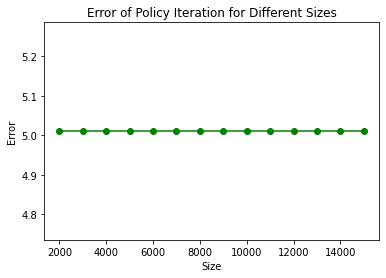

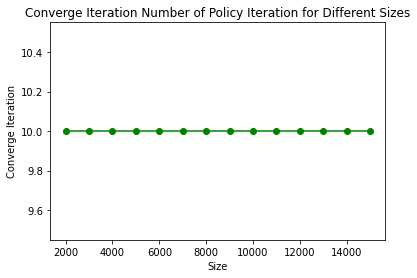

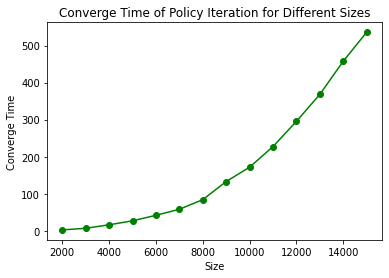

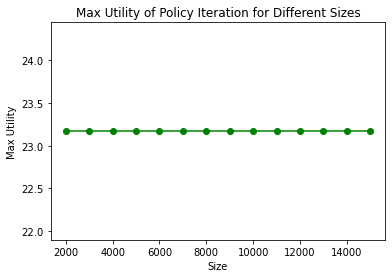

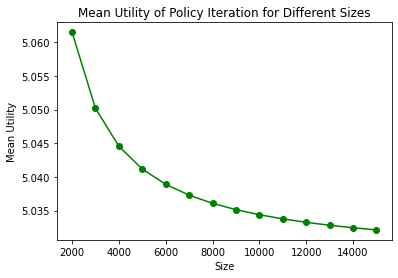

In [59]:
fig, ax = plt.subplots()
ax.plot(list(loop_size) , error_list_pi_size, "go-")
ax.set_xlabel('Size')
ax.set_ylabel('Error')
ax.set_title('Error of Policy Iteration for Different Sizes')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_size) , num_iterations_pi_size, "go-")
ax.set_xlabel('Size')
ax.set_ylabel('Converge Iteration')
ax.set_title('Converge Iteration Number of Policy Iteration for Different Sizes')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_size) , time_taken_list_pi_size, "go-")
ax.set_xlabel('Size')
ax.set_ylabel('Converge Time')
ax.set_title('Converge Time of Policy Iteration for Different Sizes')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_size) , [i[0] for i in rewards_list_pi_size], "go-")
ax.set_xlabel('Size')
ax.set_ylabel('Max Utility')
ax.set_title('Max Utility of Policy Iteration for Different Sizes')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_size) , [i[1] for i in rewards_list_pi_size], "go-")
ax.set_xlabel('Size')
ax.set_ylabel('Mean Utility')
ax.set_title('Mean Utility of Policy Iteration for Different Sizes')
plt.show(fig)

### Compare Value Iteration with Policy Iteration for different state sizes:

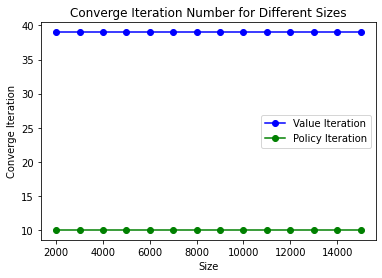

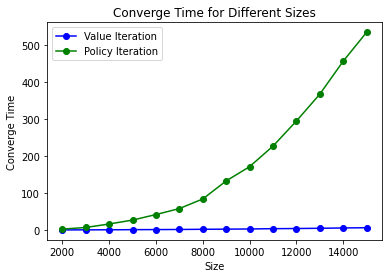

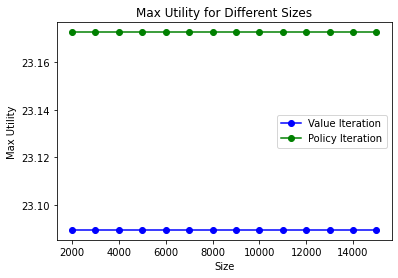

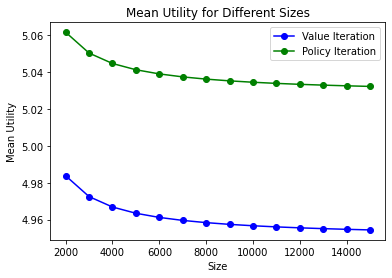

In [60]:
fig, ax = plt.subplots()
ax.plot(list(loop_size) , num_iterations_vi_size, "bo-", label='Value Iteration')
ax.plot(list(loop_size) , num_iterations_pi_size, "go-", label='Policy Iteration')
ax.set_xlabel('Size')
ax.set_ylabel('Converge Iteration')
ax.set_title('Converge Iteration Number for Different Sizes')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_size) , time_taken_list_vi_size, "bo-", label='Value Iteration')
ax.plot(list(loop_size) , time_taken_list_pi_size, "go-", label='Policy Iteration')
ax.set_xlabel('Size')
ax.set_ylabel('Converge Time')
ax.set_title('Converge Time for Different Sizes')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_size) , [i[0] for i in rewards_list_vi_size], "bo-", label='Value Iteration')
ax.plot(list(loop_size) , [i[0] for i in rewards_list_pi_size], "go-", label='Policy Iteration')
ax.set_xlabel('Size')
ax.set_ylabel('Max Utility')
ax.set_title('Max Utility for Different Sizes')
ax.legend()
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_size) , [i[1] for i in rewards_list_vi_size], "bo-", label='Value Iteration')
ax.plot(list(loop_size) , [i[1] for i in rewards_list_pi_size], "go-", label='Policy Iteration')
ax.set_xlabel('Size')
ax.set_ylabel('Mean Utility')
ax.set_title('Mean Utility for Different Sizes')
ax.legend()
plt.show(fig)

# 3. Q Learning:

In [25]:
gamma = 0.9

P, R = hiive.mdptoolbox.example.forest(2000)

ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, epsilon=0.9, epsilon_decay=0.9, n_iter=2000000)

run = ql.run()

state_run_ql = pd.DataFrame(run)

In [26]:
state_run_ql

,State,Action,Reward,Error,Time,Alpha,Epsilon,Gamma,Max V,Mean V,Iteration
0,430,0,0.0,0.000000,0.011372,0.013533,0.1,0.9,1.444602,0.001316,200
1,1663,0,0.0,0.000000,0.027358,0.001813,0.1,0.9,1.612806,0.001506,400
2,1401,1,1.0,0.002021,0.043649,0.001000,0.1,0.9,1.645606,0.001547,600
3,1303,0,0.0,0.000000,0.054459,0.001000,0.1,0.9,1.676938,0.001582,800
4,883,0,0.0,0.000000,0.072597,0.001000,0.1,0.9,1.704961,0.001614,1000
...,...,...,...,...,...,...,...,...,...,...,...
9995,239,1,1.0,0.005013,132.428411,0.001000,0.1,0.9,5.026947,0.056055,1999200
9996,479,1,1.0,0.004949,132.439860,0.001000,0.1,0.9,5.026934,0.056060,1999400
9997,1641,0,0.0,0.000003,132.452434,0.001000,0.1,0.9,5.026918,0.056062,1999600
9998,336,1,1.0,0.005006,132.465022,0.001000,0.1,0.9,5.026902,0.056069,1999800


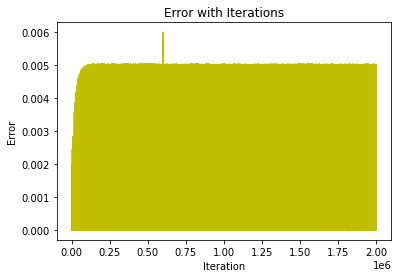

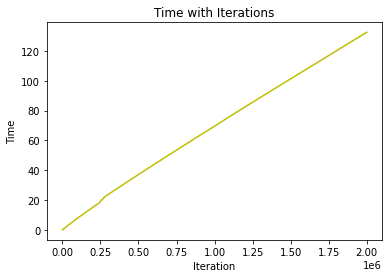

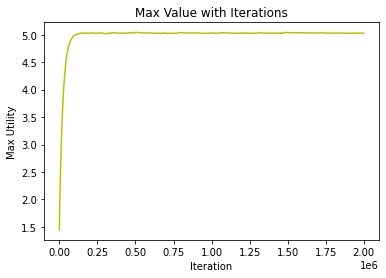

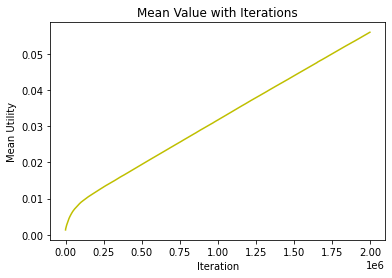

In [61]:
fig, ax = plt.subplots()
ax.plot(state_run_ql['Iteration'] , state_run_ql['Error'], "y-")
ax.set_xlabel('Iteration')
ax.set_ylabel('Error')
ax.set_title('Error with Iterations')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(state_run_ql['Iteration'] , state_run_ql['Time'], "y-")
ax.set_xlabel('Iteration')
ax.set_ylabel('Time')
ax.set_title('Time with Iterations')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(state_run_ql['Iteration'] , state_run_ql['Max V'], "y-")
ax.set_xlabel('Iteration')
ax.set_ylabel('Max Utility')
ax.set_title('Max Value with Iterations')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(state_run_ql['Iteration'] , state_run_ql['Mean V'], "y-")
ax.set_xlabel('Iteration')
ax.set_ylabel('Mean Utility')
ax.set_title('Mean Value with Iterations')
plt.show(fig)

### Tune Epsilon:

In [29]:
gamma = 0.9

loop_epsilon = np.arange(0.1, 1 , 0.1)

P, R = hiive.mdptoolbox.example.forest(2000)

util_opt_pol_ql_ep = []
error_list_ql_ep = []
time_taken_list_ql_ep = []
rewards_list_ql_ep = []

for i in loop_epsilon:
    print("Current Epsilon is:", i)

    ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, epsilon=i, epsilon_decay=0.9, n_iter=200000)

    ql.run()

    util_opt_pol_ql_ep.append(ql.policy)
    error_list_ql_ep.append(ql.error_mean)
    time_taken_list_ql_ep.append(ql.time)
    rewards_list_ql_ep.append([np.max(ql.V), np.mean(ql.V)])
    
    print("Utility of optimal policy is:" ,(np.max(ql.V), np.mean(ql.V)))
    print("Converge Time is:", ql.time)

Current Epsilon is: 0.1
Utility of optimal policy is: (5.025485324368879, 0.013607739720604962)
Converge Time is: 17.568951845169067
Current Epsilon is: 0.2
Utility of optimal policy is: (4.583682140808049, 0.01045006568690393)
Converge Time is: 15.773843050003052
Current Epsilon is: 0.30000000000000004
Utility of optimal policy is: (5.022351139688522, 0.013553717825633717)
Converge Time is: 15.143007040023804
Current Epsilon is: 0.4
Utility of optimal policy is: (5.029252438000019, 0.013531102634970342)
Converge Time is: 15.322054386138916
Current Epsilon is: 0.5
Utility of optimal policy is: (5.01584775224038, 0.011921151673541358)
Converge Time is: 15.63786268234253
Current Epsilon is: 0.6
Utility of optimal policy is: (5.019654728507006, 0.011902626043473185)
Converge Time is: 15.40517282485962
Current Epsilon is: 0.7000000000000001
Utility of optimal policy is: (5.023818711615288, 0.011910639170661739)
Converge Time is: 15.318252563476562
Current Epsilon is: 0.8
Utility of optimal

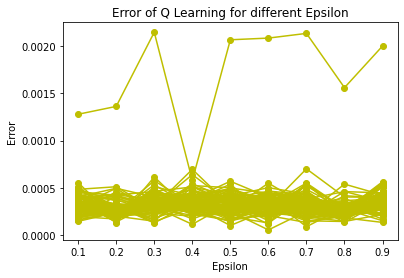

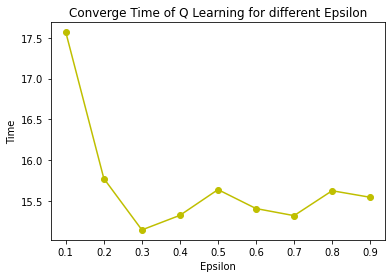

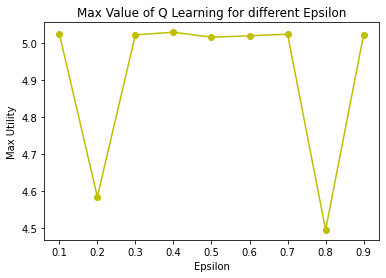

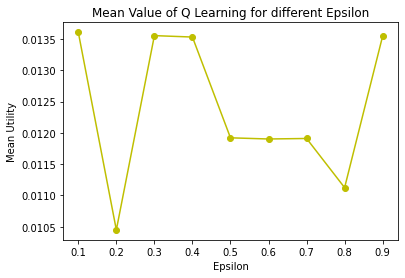

In [62]:
fig, ax = plt.subplots()
ax.plot(list(loop_epsilon) , error_list_ql_ep, "yo-")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Error')
ax.set_title('Error of Q Learning for different Epsilon')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_epsilon) , time_taken_list_ql_ep, "yo-")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Time')
ax.set_title('Converge Time of Q Learning for different Epsilon')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_epsilon) , [i[0] for i in rewards_list_ql_ep], "yo-")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Max Utility')
ax.set_title('Max Value of Q Learning for different Epsilon')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_epsilon) , [i[1] for i in rewards_list_ql_ep], "yo-")
ax.set_xlabel('Epsilon')
ax.set_ylabel('Mean Utility')
ax.set_title('Mean Value of Q Learning for different Epsilon')
plt.show(fig)

### Tune Alpha:

In [35]:
gamma = 0.9
epsilon = 0.3

loop_alpha = np.arange(0.1, 1 , 0.1)

P, R = hiive.mdptoolbox.example.forest(2000)

util_opt_pol_ql_alpha = []
error_list_ql_alpha = []
time_taken_list_ql_alpha = []
rewards_list_ql_alpha = []

for i in loop_alpha:
    print("Current Alpha is:", i)

    ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, alpha=i, epsilon=epsilon, epsilon_decay=0.9, n_iter=200000)

    ql.run()

    util_opt_pol_ql_alpha.append(ql.policy)
    error_list_ql_alpha.append(ql.error_mean)
    time_taken_list_ql_alpha.append(ql.time)
    rewards_list_ql_alpha.append([np.max(ql.V), np.mean(ql.V)])
    
    print("Utility of optimal policy is:" ,(np.max(ql.V), np.mean(ql.V)))
    print("Converge Time is:", ql.time)

Current Alpha is: 0.1
Utility of optimal policy is: (4.485774357637749, 0.0109358045640812)
Converge Time is: 15.661099910736084
Current Alpha is: 0.2
Utility of optimal policy is: (5.034207191097212, 0.01198382523832392)
Converge Time is: 15.569109201431274
Current Alpha is: 0.30000000000000004
Utility of optimal policy is: (5.022940959669268, 0.012652029777919635)
Converge Time is: 15.279284238815308
Current Alpha is: 0.4
Utility of optimal policy is: (5.025633878894542, 0.01415029172596414)
Converge Time is: 15.204410791397095
Current Alpha is: 0.5
Utility of optimal policy is: (5.023185780372332, 0.01284734211649934)
Converge Time is: 15.445300102233887
Current Alpha is: 0.6
Utility of optimal policy is: (5.029674266199577, 0.015369213055074642)
Converge Time is: 15.638783693313599
Current Alpha is: 0.7000000000000001
Utility of optimal policy is: (4.9936769141061585, 0.013843547977306213)
Converge Time is: 15.461506843566895
Current Alpha is: 0.8
Utility of optimal policy is: (5.0

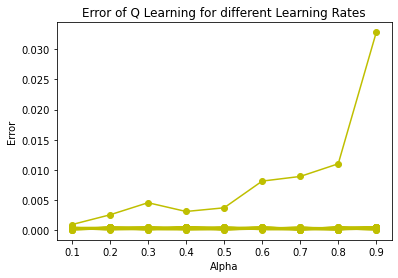

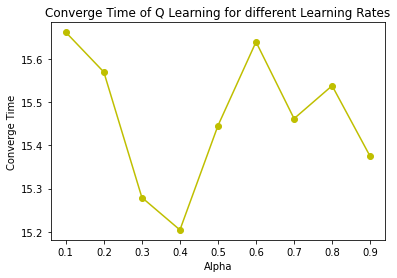

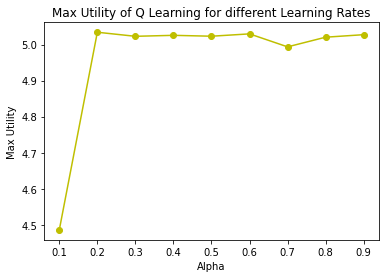

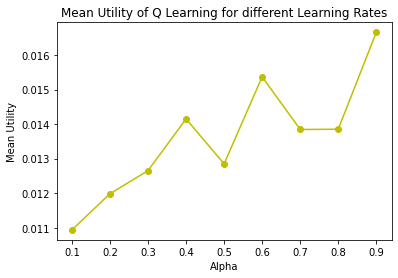

In [63]:
fig, ax = plt.subplots()
ax.plot(list(loop_alpha) , error_list_ql_alpha, "yo-")
ax.set_xlabel('Alpha')
ax.set_ylabel('Error')
ax.set_title('Error of Q Learning for different Learning Rates')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_alpha) , time_taken_list_ql_alpha, "yo-")
ax.set_xlabel('Alpha')
ax.set_ylabel('Converge Time')
ax.set_title('Converge Time of Q Learning for different Learning Rates')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_alpha) , [i[0] for i in rewards_list_ql_alpha], "yo-")
ax.set_xlabel('Alpha')
ax.set_ylabel('Max Utility')
ax.set_title('Max Utility of Q Learning for different Learning Rates')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_alpha) , [i[1] for i in rewards_list_ql_alpha], "yo-")
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Utility')
ax.set_title('Mean Utility of Q Learning for different Learning Rates')
plt.show(fig)


### Tune Gamma

In [67]:
alpha = 0.9
epsilon = 0.3

loop_gamma = np.arange(0.1, 1 , 0.1)

P, R = hiive.mdptoolbox.example.forest(2000)

util_opt_pol_ql_gamma = []
error_list_ql_gamma = []
time_taken_list_ql_gamma = []
rewards_list_ql_gamma = []

for i in loop_gamma:
    print("Current Gamma is:", i)

    ql = hiive.mdptoolbox.mdp.QLearning(P, R, i, alpha=alpha, epsilon=epsilon, epsilon_decay=0.9, n_iter=200000)

    ql.run()

    util_opt_pol_ql_gamma.append(ql.policy)
    error_list_ql_gamma.append(ql.error_mean)
    time_taken_list_ql_gamma.append(ql.time)
    rewards_list_ql_gamma.append([np.max(ql.V), np.mean(ql.V)])
    
    print("Utility of optimal policy is:" ,(np.max(ql.V), np.mean(ql.V)))
    print("Converge Time is:", ql.time)

Current Gamma is: 0.1
Utility of optimal policy is: (1.0092214454009856, 0.001835573753334399)
Converge Time is: 15.379679441452026
Current Gamma is: 0.2
Utility of optimal policy is: (1.0381316167121055, 0.0020269058661116046)
Converge Time is: 15.508889198303223
Current Gamma is: 0.30000000000000004
Utility of optimal policy is: (1.0913208798137723, 0.0036123047328170976)
Converge Time is: 15.53277850151062
Current Gamma is: 0.4
Utility of optimal policy is: (1.1761808784527357, 0.003414987815754855)
Converge Time is: 15.336907863616943
Current Gamma is: 0.5
Utility of optimal policy is: (1.3106782605763756, 0.0034866266563977643)
Converge Time is: 15.324924230575562
Current Gamma is: 0.6
Utility of optimal policy is: (1.5259588812206208, 0.0037502565630283574)
Converge Time is: 15.49551010131836
Current Gamma is: 0.7000000000000001
Utility of optimal policy is: (1.9004767677642942, 0.005874851689890634)
Converge Time is: 15.525734663009644
Current Gamma is: 0.8
Utility of optimal po

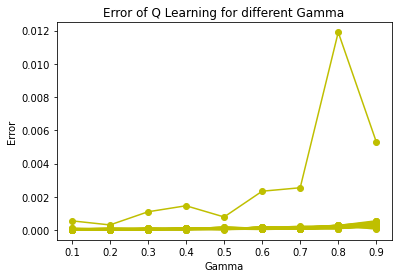

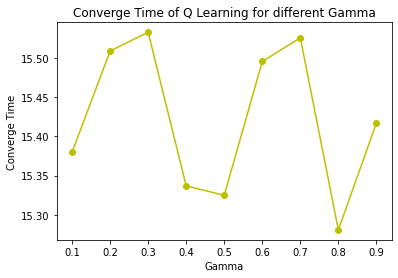

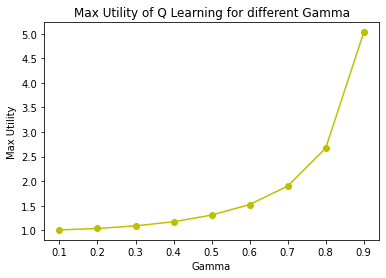

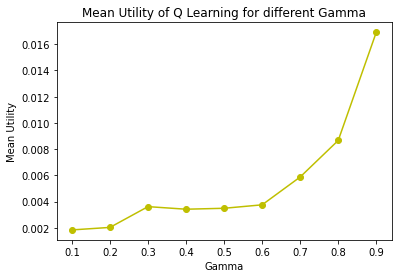

In [68]:
fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , error_list_ql_gamma, "yo-")
ax.set_xlabel('Gamma')
ax.set_ylabel('Error')
ax.set_title('Error of Q Learning for different Gamma')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , time_taken_list_ql_gamma, "yo-")
ax.set_xlabel('Gamma')
ax.set_ylabel('Converge Time')
ax.set_title('Converge Time of Q Learning for different Gamma')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , [i[0] for i in rewards_list_ql_gamma], "yo-")
ax.set_xlabel('Gamma')
ax.set_ylabel('Max Utility')
ax.set_title('Max Utility of Q Learning for different Gamma')
plt.show(fig)

fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , [i[1] for i in rewards_list_ql_gamma], "yo-")
ax.set_xlabel('Gamma')
ax.set_ylabel('Mean Utility')
ax.set_title('Mean Utility of Q Learning for different Gamma')
plt.show(fig)

# 4. Optimal Policy:

In [37]:
P, R = hiive.mdptoolbox.example.forest(2000)

In [43]:
action_mapping = {0:'W', 1:'C'}

def visualize_policy(policy):
    cnt = 0
    new_text_sum = ""

    for i in policy:
        if cnt % 100 == 0:
            new_text_sum += "\n"
        new_text_sum += action_mapping[i]
        cnt +=1

    return new_text_sum

## Value Iteration:

In [39]:
gamma = 0.9

vi = hiive.mdptoolbox.mdp.ValueIteration(P, R, gamma)

run_vi = vi.run()

In [41]:
print(np.max(vi.V), np.mean(vi.V), vi.time)

23.089675091923866 4.983734089077706 0.11443424224853516


In [44]:
print(visualize_policy(vi.policy))


WCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC

In [45]:
"Cut Action", np.sum(list(vi.policy))

('Cut Action', 1989)

## Policy Iteration:

In [46]:
gamma = 0.9

pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma)

run_pi = pi.run()

In [47]:
print(np.max(pi.V), np.mean(pi.V), pi.time)

23.172433847048566 5.06147506941097 1.878964900970459


In [48]:
print(visualize_policy(pi.policy))


WCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC
CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC

In [49]:
"Cut Action", np.sum(list(pi.policy))

('Cut Action', 1989)

## Q Learning:

In [50]:
gamma = 0.9

ql = hiive.mdptoolbox.mdp.QLearning(P, R, gamma, alpha=0.9, epsilon=0.3, epsilon_decay=0.9, n_iter=200000)

run_ql = ql.run()

In [51]:
print(np.max(ql.V), np.mean(ql.V), ql.time)

5.023475749980815 0.01586170076160027 15.63202714920044


In [52]:
print(visualize_policy(ql.policy))


WCWCWCCCCWCWWCCCWCWWWWWWCWWWWWWCCWCWWWWWWWWWCWWWWWWWWCWWCWWWWCWWWWCWWWWWCWWWWCCWCWWWWWCCWWCWWWWWWWCW
WWWWWWWCWWWWWCWWCWWWWWWWCWWWWWWCWWWWWWWWWWWWWWWWWWWCWWCWWWWWWWWCWWWWWCWWWWWWWCWWWWWWWWWWWWWCWWCWWWWW
WWWWWWWWWCWWWWCCCWCCWWWWWWWCWWWWWWWWWWWWCCWWCWCWWCCWWCWWWWWWWWWCWWCWWWWWCCWCCWWWWCWWWWWWWWCWWWWWWWWW
WWWCWCWWWWWWWCWCWWWWWWWCWWCWCCCWWWWCWWWCWWCWCWWWWWWWCCWWCWWCWWWWCWWWWWCWWCWWWWWWWWWWWWCCWWWCWWWWWWCW
WWWCWWWWWCWWWWWWWCWWWCWWWWWCWWWWWWWCCWWWCWWWCWWWWWCWWCCWWWWWWWWWWWWWWWWWWWWWWWCWWWWWWCWCWWWWCWWWCWWC
WWWWCWWWWCWWWWWWWWWWWWWWWWWWWCWWWWWWCWWWWCWWWWWWCCWWWWWWWCCWWWWWWWCWWCWWWWWWWWCWWCWWWWCWWCWWWWWCWWWW
WWWWWWCWWWWWWWWCCWWWWWWWWWCWWCWCWWWWWWWWWCWCWWWWWWWCWWWWWWCWWWCWWCWWWWWWWWWWCWWWCWWWWWWWWWWWWWCWWWCW
WWWCWWWWWCWWWWWCWWWWWWWWWCWWCWWWCWWWWWWCWWWWWWWWWWCWCWWWWWWWWCWCWWWWWWWCWWWWWWWWCWCWWWWCWWWWWCWWCWWW
CWWWWWWCWWWWWWWWWWWWCWWCWWWWWWWWWWCWWWWWCWCWWWWWWWCWWWWWWWWCWWCWWWWWWWWWWWWWCWWCWWWWWWCWWWWWCWWWWWCW
WWCWCWWWWWWCWWWWWWCCWWWWWWWCWWWWCWCWWCWWWWWCWWWCWCWWWWCWWWWWWCWWCWWWWWWCWWWWWWCCWWWCWWWWCW

In [53]:
"Cut Action", np.sum(list(ql.policy)), 1000 - np.sum(list(ql.policy))

('Cut Action', 371, 629)